In [89]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [90]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [91]:
%cd '/content/drive/MyDrive/Colab Notebooks/Datasets_ML2'

/content/drive/MyDrive/Colab Notebooks/Datasets_ML2


In [128]:
df= pd.read_csv (r'/content/Income_Dataset.csv')
df

,Age,Work-Class,Final_Weight,Education,Educational_Years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,>100K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,56,Private,203580,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,NaN,<=50K
246,58,Private,236596,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,>50K
247,32,Private,183916,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,34,United-States,<=50K
248,40,Private,207578,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,60,United-States,>50K


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                250 non-null    int64 
 1   Work-Class         237 non-null    object
 2   Final_Weight       250 non-null    int64 
 3   Education          250 non-null    object
 4   Educational_Years  250 non-null    int64 
 5   Marital_Status     250 non-null    object
 6   Occupation         240 non-null    object
 7   Relationship       250 non-null    object
 8   Race               250 non-null    object
 9   Gender             250 non-null    object
 10  Capital_Gain       250 non-null    int64 
 11  Capital_Loss       250 non-null    int64 
 12  Hours_Per_Week     250 non-null    int64 
 13  Native_Country     247 non-null    object
 14  Income             250 non-null    object
dtypes: int64(6), object(9)
memory usage: 29.4+ KB


In [94]:
df.describe()

,Age,Final_Weight,Educational_Years,Capital_Gain,Capital_Loss,Hours_Per_Week
count,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000
mean,38.676000,191643.140000,10.180000,628.97600,131.404000,40.260000
std,13.459557,109785.349277,2.675863,3102.53252,476.800457,11.245722
min,17.000000,24215.000000,1.000000,0.00000,0.000000,1.000000
25%,29.000000,115489.750000,9.000000,0.00000,0.000000,40.000000
50%,37.500000,180174.500000,10.000000,0.00000,0.000000,40.000000
75%,47.000000,248944.750000,13.000000,0.00000,0.000000,42.750000
max,90.000000,635913.000000,16.000000,34095.00000,2206.000000,80.000000


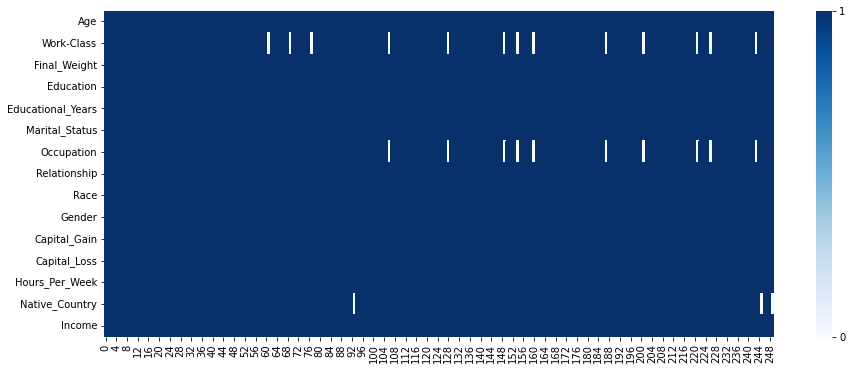

In [95]:
import seaborn as sns
import matplotlib

select_df =  df.copy().sort_index()

select_df = select_df.T
select_df = pd.DataFrame(np.where(select_df.isna(), 0, 1), 
                                       columns = df.index, index=select_df.index)
select_df.columns = df.index
plt.figure(figsize=(15, 6))
matplotlib.rc('font', family='Hiragino Sans')
sns.heatmap(select_df, cmap='Blues', vmin=0, cbar_kws={'ticks': [0,1]})

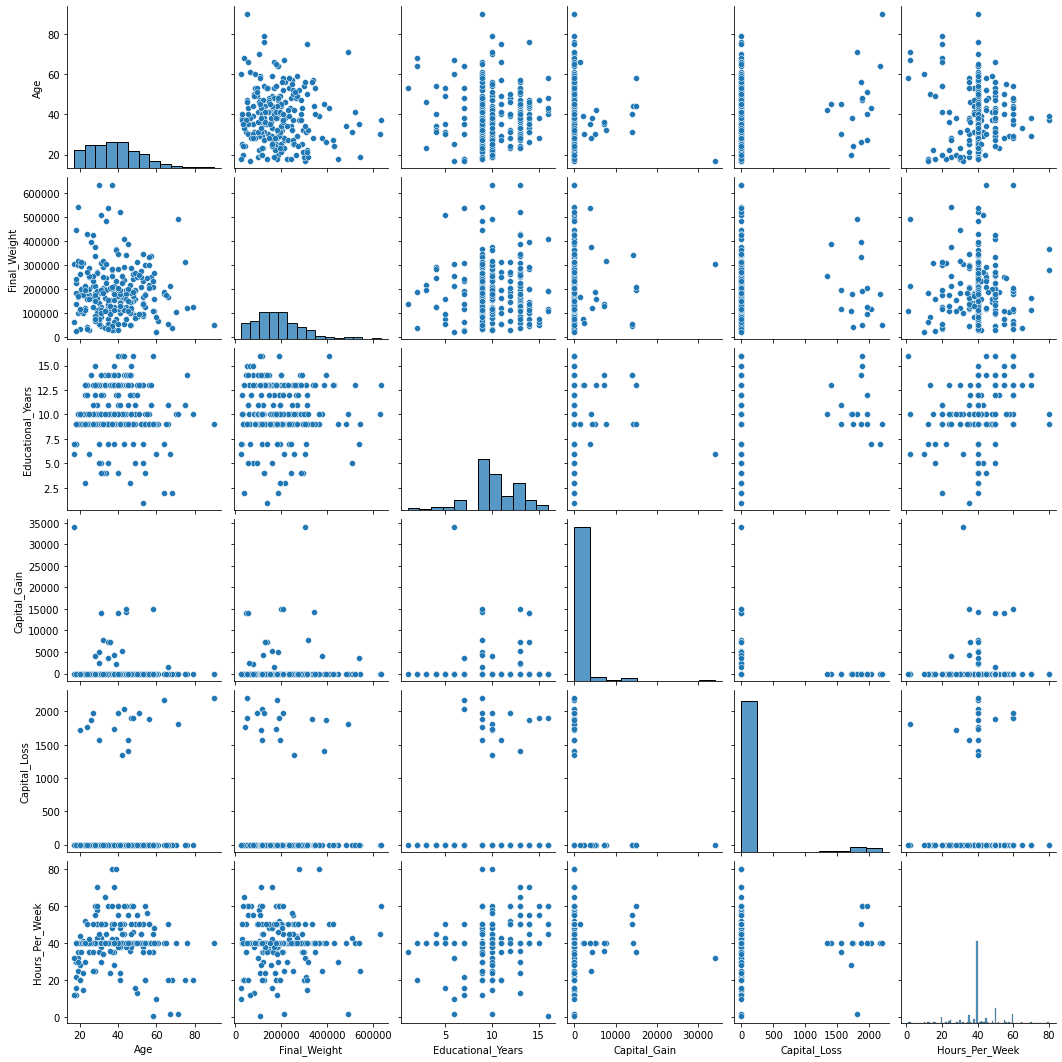

In [96]:
sns.pairplot(df)

In [97]:
all_columns = list(df.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(df.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Work-Class', 'Final_Weight', 'Education', 'Educational_Years', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Income']
Categorical columns:
 ['Work-Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Native_Country', 'Income']
Numerical columns:
 ['Age', 'Final_Weight', 'Educational_Years', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']


In [129]:
label_encoder = LabelEncoder()
encoded_adult_data = df
for i in categorical_columns:
    encoded_adult_data[i] = label_encoder.fit_transform(df[i])
encoded_adult_data[categorical_columns].head()

,Work-Class,Education,Marital_Status,Occupation,Relationship,Race,Gender,Native_Country,Income
0,6,8,4,1,1,4,1,16,1
1,5,8,2,3,0,4,1,16,0
2,3,10,0,5,1,4,1,16,0
3,3,1,2,5,0,2,1,16,0
4,3,8,2,8,5,2,0,3,0


In [99]:
min_max_scaler = MinMaxScaler()

scaled_encoded_adult_data = pd.DataFrame()

column_values = encoded_adult_data.columns.values
column_values = column_values[:-1]
print(column_values[-1])

scaled_values = min_max_scaler.fit_transform(encoded_adult_data[column_values])

for i in range(len(column_values)):
    scaled_encoded_adult_data[column_values[i]] = scaled_values[:,i]
    
scaled_encoded_adult_data['Income'] = encoded_adult_data['Income']
scaled_encoded_adult_data.sample(10)


Native_Country


,Age,Work-Class,Final_Weight,Education,Educational_Years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
206,0.260274,0.428571,0.170905,0.571429,0.800000,0.333333,0.538462,0.0,0.50,1.0,0.214049,0.0,0.443038,0.941176,2
99,0.205479,0.142857,0.368146,0.714286,0.533333,0.666667,0.538462,0.6,0.50,1.0,0.000000,0.0,0.493671,0.941176,0
232,0.109589,0.428571,0.221542,1.000000,0.600000,0.666667,0.076923,0.2,1.00,1.0,0.000000,0.0,0.518987,0.941176,0
179,0.219178,0.428571,0.021349,0.571429,0.800000,0.333333,0.615385,0.0,1.00,1.0,0.000000,0.0,0.810127,0.941176,0
108,0.191781,0.285714,0.269823,0.714286,0.533333,0.666667,0.076923,0.2,1.00,0.0,0.000000,0.0,0.493671,0.941176,0
162,0.369863,0.571429,0.088539,0.785714,0.866667,0.000000,0.230769,0.8,0.25,0.0,0.000000,0.0,0.493671,0.941176,0
50,0.109589,0.428571,0.013176,1.000000,0.600000,0.333333,0.230769,1.0,0.75,0.0,0.000000,0.0,0.493671,0.941176,0
137,0.136986,0.428571,0.227092,0.500000,0.666667,0.333333,0.076923,1.0,1.00,0.0,0.000000,0.0,0.430380,0.941176,0
10,0.273973,0.428571,0.418914,1.000000,0.600000,0.333333,0.230769,0.0,0.50,1.0,0.000000,0.0,1.000000,0.941176,2
229,0.657534,0.428571,0.249438,0.714286,0.533333,0.000000,0.076923,0.2,1.00,0.0,0.000000,0.0,0.493671,0.941176,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

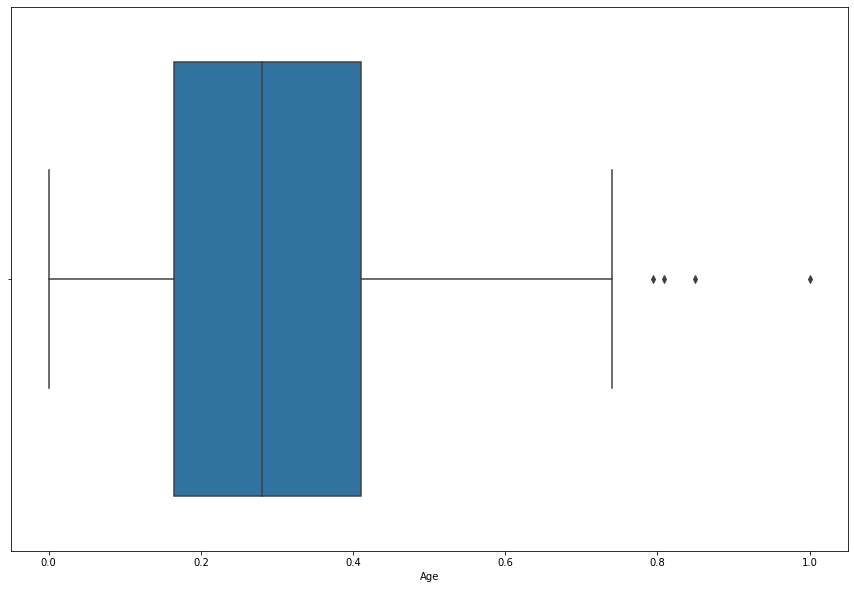

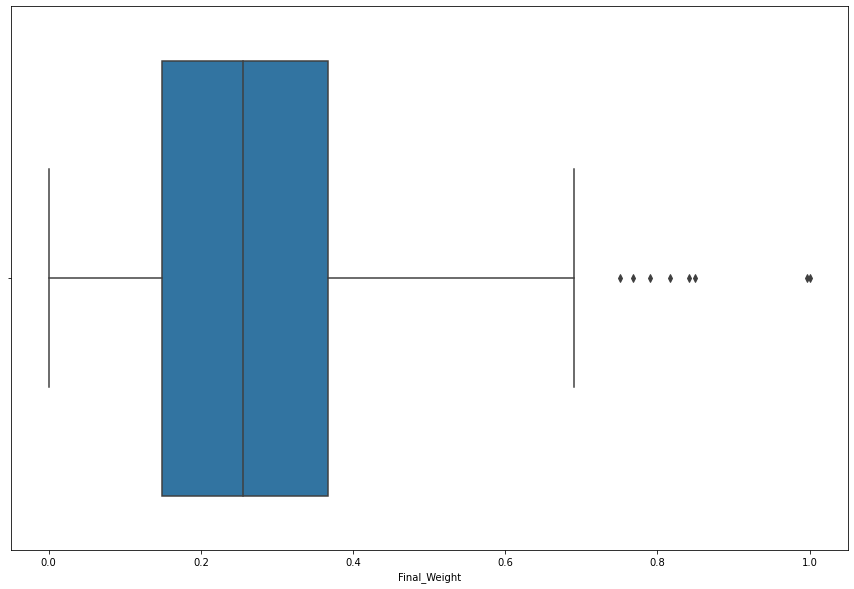

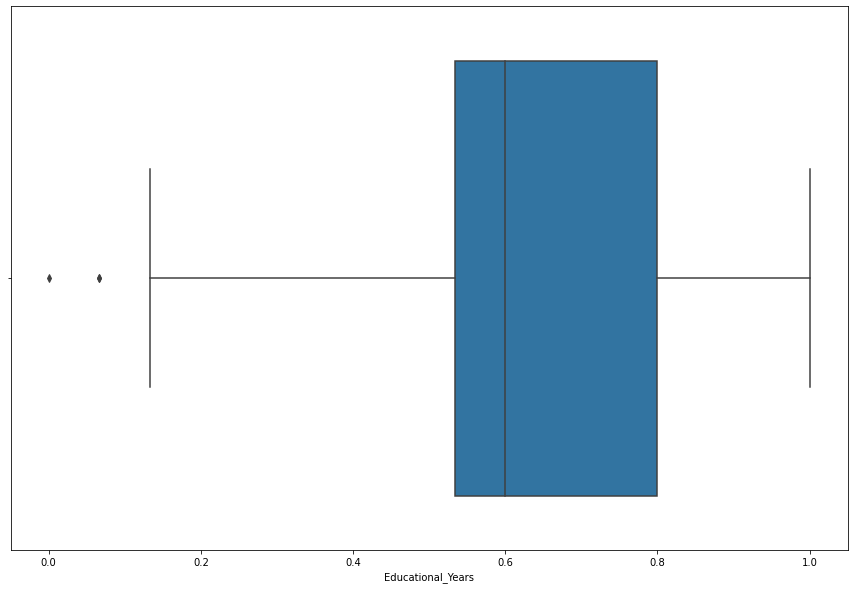

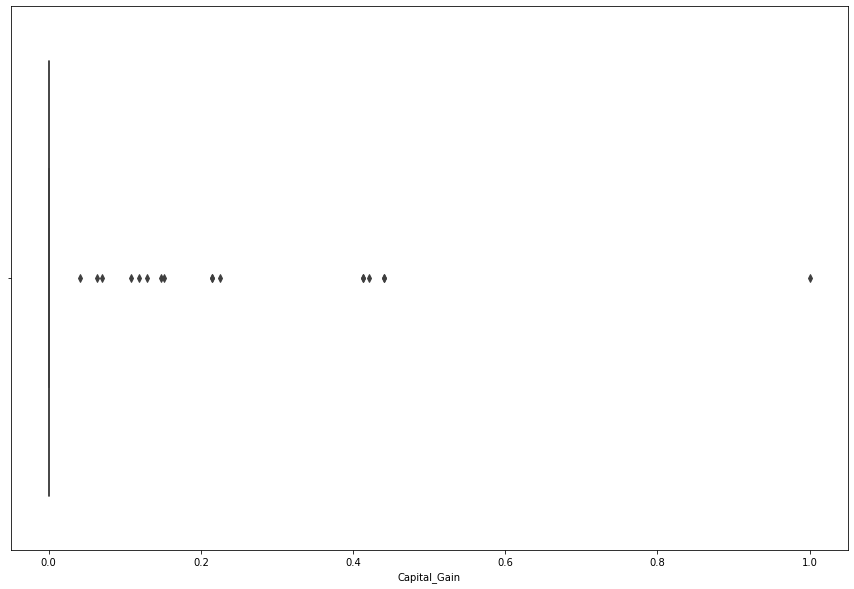

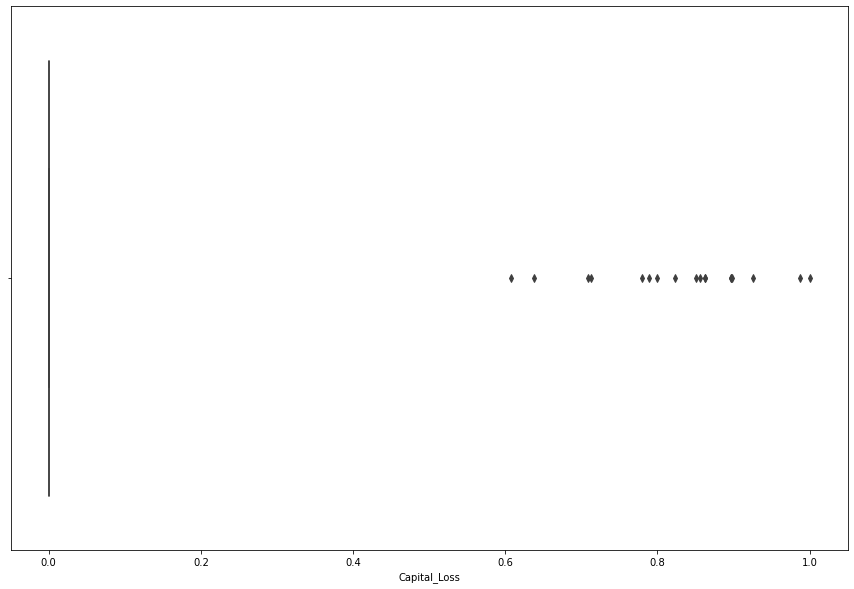

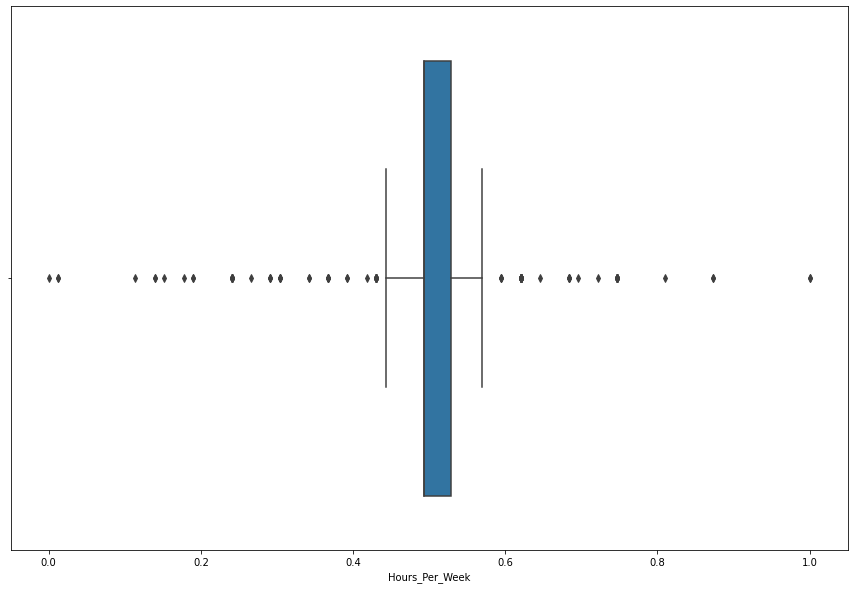

In [100]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(scaled_encoded_adult_data[numerical_columns[i]])
plt.show()

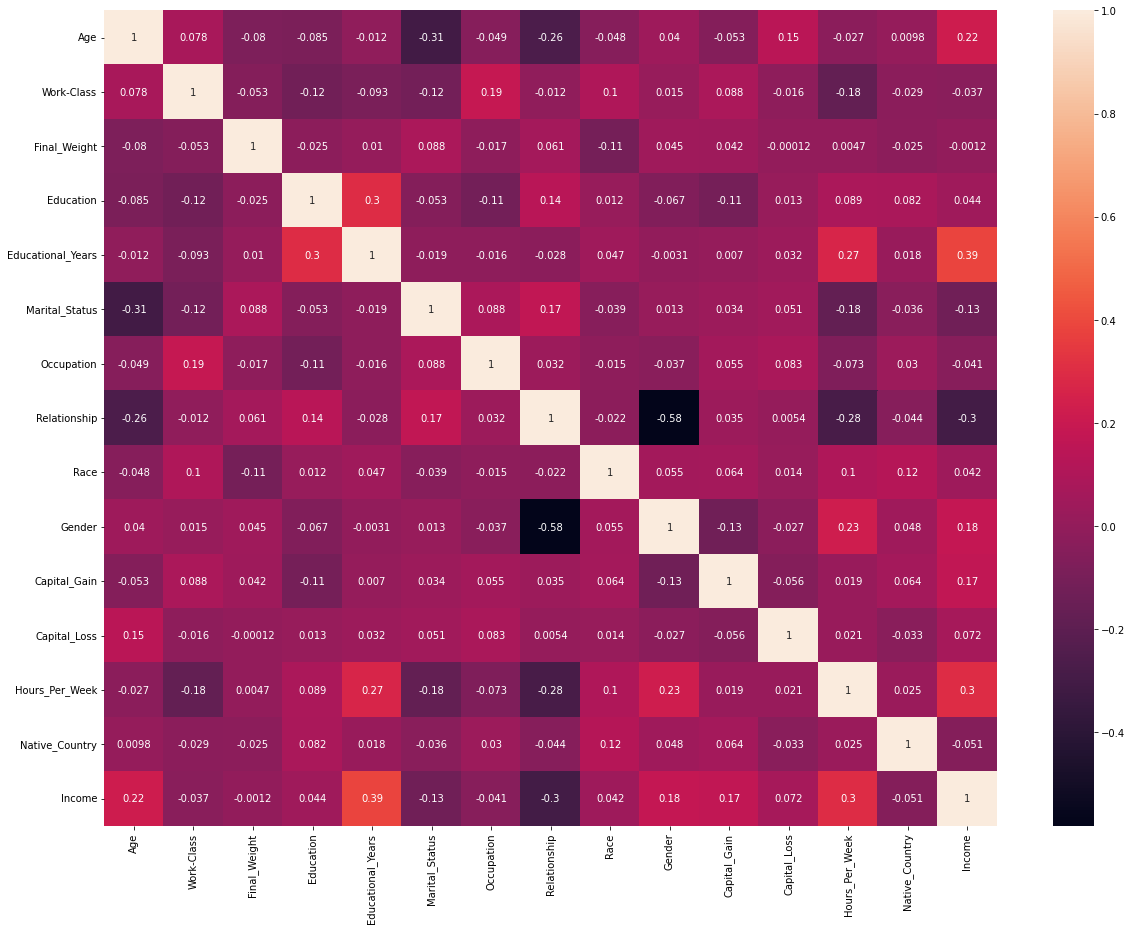

In [101]:
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(scaled_encoded_adult_data.corr(),annot=True)

In [130]:
df.drop_duplicates()
#shape is same means no duplicates are present in the data

,Age,Work-Class,Final_Weight,Education,Educational_Years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,6,77516,8,13,4,1,1,4,1,2174,0,40,16,1
1,50,5,83311,8,13,2,3,0,4,1,0,0,13,16,0
2,38,3,215646,10,9,0,5,1,4,1,0,0,40,16,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,16,0
4,28,3,338409,8,13,2,8,5,2,0,0,0,40,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,56,3,203580,10,9,2,1,0,4,1,0,0,35,17,0
246,58,3,236596,10,9,2,1,0,4,1,0,0,45,16,2
247,32,3,183916,10,9,4,7,1,4,0,0,0,34,16,0
248,40,3,207578,6,12,2,11,0,4,1,0,1977,60,16,2


In [103]:
df = df.replace(to_replace = '?', value = np.nan) #replaces everything with a '?' with Nan
df.isna().sum()

Age                  0
Work-Class           0
Final_Weight         0
Education            0
Educational_Years    0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Gender               0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country       0
Income               0
dtype: int64

In [132]:
df_updated = df.dropna()
df_updated.shape

(250, 15)

In [131]:
#categorical data
categorical_cols = [ 'Work-Class', 'Education',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender','Native_Country','Income'] 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
for i in categorical_cols:
  #encode categorical columns data
  df_updated[i] = label_encoder.fit_transform(df_updated[i]) 




In [106]:
df_updated

,Age,Work-Class,Final_Weight,Education,Educational_Years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,6,77516,8,13,4,1,1,4,1,2174,0,40,16,1
1,50,5,83311,8,13,2,3,0,4,1,0,0,13,16,0
2,38,3,215646,10,9,0,5,1,4,1,0,0,40,16,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,16,0
4,28,3,338409,8,13,2,8,5,2,0,0,0,40,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,56,3,203580,10,9,2,1,0,4,1,0,0,35,17,0
246,58,3,236596,10,9,2,1,0,4,1,0,0,45,16,2
247,32,3,183916,10,9,4,7,1,4,0,0,0,34,16,0
248,40,3,207578,6,12,2,11,0,4,1,0,1977,60,16,2


In [107]:
X = df_updated.drop(['Income'], axis = 1)
y = df_updated['Income']

In [108]:
y.unique()

array([1, 0, 2])

In [109]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 42)

In [110]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    """    
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [111]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1)
    return theta

In [112]:
def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))

In [113]:
def Logistics_Regression(X,y,learningrate, iterations):
    """ Find the Logistics regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
    
    y_new = np.reshape(y, (len(y))) 
    
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 1/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1 - y_new).T,np.log(1-y_pred)))) /(len(y_pred))
 #Calculate the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta

In [114]:
def column(matrix, i):
    """ Returning all the values in a specific columns
         Parameters:
          X: the input matrix
          i: the column
     Return value: an array with desired column
    """
    return np.array([row[i] for row in matrix], dtype=float)
    
def accuracy_LR(X,y,learningrate, iteration,X_t, y_t):
    """ Returning the accuracy score for a training model
    
    """
    ideal = Logistics_Regression(X,y,learningrate, iteration)
    hypo_line = ideal[0]
    for i in range(1,len(ideal)):
      hypo_line = hypo_line + ideal[i]*column(X_t,i-1)
    logistic_function = sigmoid_function(hypo_line)
    for i in range(len(logistic_function)):
        if logistic_function[i] >= 0.5:
            logistic_function[i] = 1
        else:
            logistic_function[i] = 0
    y_t = y_t.to_numpy()
    last1 = np.concatenate((logistic_function.reshape(len(logistic_function),1), y_t.reshape(len(y_t),1)),1)


    # fig3, ax3 = plt.subplots()
    # ax3.scatter(np.array(last1[i][0]), np.array(last1[i][1]), edgecolors=(0, 0, 0))
    # ax3.plot([np.array(last1[i][1]).min(), np.array(last1[i][1]).max()], [np.array(last1[i][1]).min(), np.array(last1[i][1]).max()], "k--", lw=4)
    # ax3.set_xlabel("Actual")
    # ax3.set_ylabel("Predicted")
    # plt.show()


    count = 0
    for i in range(len(y_t)):
        if last1[i][0] == last1[i][1]:
            count = count+1
    acc = count/(len(y_t))
    return acc

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

array([ 0.52330725,  1.25081936, -0.54962649,  1.05271911, -0.59087087,
        1.83438805, -0.23287071,  0.56478715, -1.33925102,  0.6008297 ,
       -0.3345306 ,  0.93213331, -0.29340103,  1.07634334,  0.21222405])

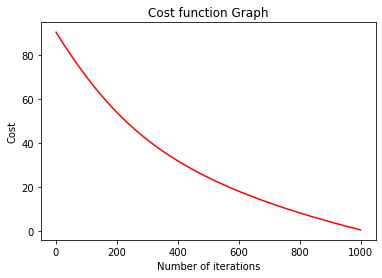

In [116]:
Logistics_Regression(X_train,y_train,0.01, 1000)

0.58

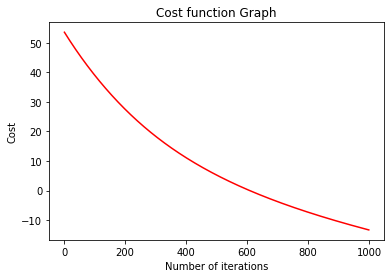

In [117]:
accuracy_LR(X_train,y_train, 0.01, 1000,X_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


0.54

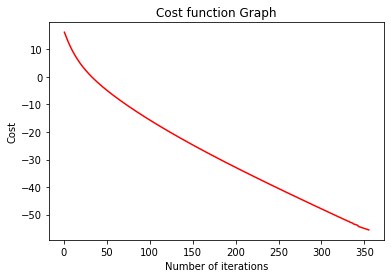

In [118]:
accuracy_LR(X_train,y_train, 0.1, 1000,X_val, y_val)

0.46

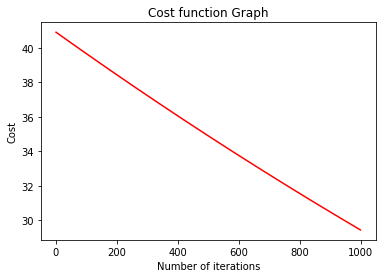

In [119]:
accuracy_LR(X_train,y_train, 0.001, 1000,X_val, y_val)

0.52

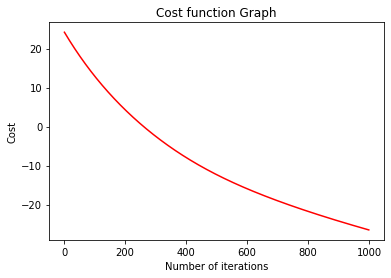

In [120]:
accuracy_LR(X_train,y_train, 0.01, 1000,X_test, y_test)

In [121]:
from sklearn.metrics import accuracy_score
#Training
model_logistic = LogisticRegression(C=0.1).fit(X_train, y_train)

#Predict
y_pred_train = model_logistic.predict(X_train)
y_pred_test = model_logistic.predict(X_test)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 80.0%
Testing Set Accuracy: 70.0%


In [122]:
from sklearn.metrics import accuracy_score
#Training
model_logistic = LogisticRegression(C=1).fit(X_train, y_train)

#Predict
y_pred_train = model_logistic.predict(X_train)
y_pred_test = model_logistic.predict(X_test)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 82.66666666666667%
Testing Set Accuracy: 74.0%


In [123]:
from sklearn.metrics import accuracy_score
#Training
model_logistic = LogisticRegression(C=100).fit(X_train, y_train)

#Predict
y_pred_train = model_logistic.predict(X_train)
y_pred_test = model_logistic.predict(X_test)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 82.66666666666667%
Testing Set Accuracy: 72.0%


In [124]:
#Training
model_logistic_poly = LogisticRegression(C=10000).fit(X_train, y_train)

#Predict
y_pred_train = model_logistic_poly.predict(X_train)
y_pred_test = model_logistic_poly.predict(X_test)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 82.66666666666667%
Testing Set Accuracy: 72.0%


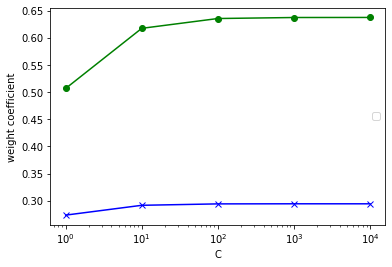

In [125]:
weights, params = [], []
for c in np.arange(0, 5):
   lr = LogisticRegression(C=10**c, random_state=0)
   lr.fit(X_train, y_train)
   weights.append(lr.coef_[1])
   params.append(10**c)

weights = np.array(weights)

# Decision region drawing
import matplotlib.pyplot as plt

plt.plot(params, weights[:, 0], color='blue', marker='x')
plt.plot(params, weights[:, 1], color='green',  marker='o')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

In [139]:
co=['Age','Work-Class']

In [142]:
x1=df[co]

In [143]:
y1=df['Income']

In [145]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(x1, y1,
    test_size=0.2, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 42)

In [146]:
model_logistic2 = LogisticRegression(C=0.1).fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


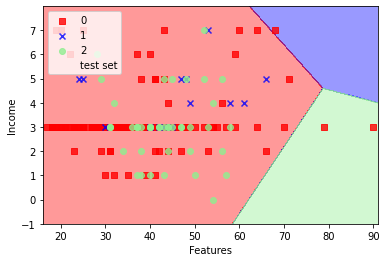

In [148]:
# Decision region drawing
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined, classifier= model_logistic2,
                      test_idx=range(105,150))

plt.xlabel('Features')
plt.ylabel('Income')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay


# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
# X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
# transformation = [[0.4, 0.2], [-0.4, 1.2]]
# X = np.dot(X, transformation)

for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class=multi_class
    ).fit(X_train, y_train)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X_train, y_train), multi_class))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_train, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X_train[idx, 0], X_train[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()